In [1]:
import numpy as np 
import pandas as pd 
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netfilx_df = pd.read_csv("netflix_titles.csv")
netfilx_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
netfilx_df.info()

# total rows = 8807
# total cols = 12

# only the release_year col entries are in numerical form

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
netfilx_df.nunique()    # shows how many unique entries each column have

# we can clearly say that all the movies and tvshows are unique 

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [5]:
netfilx_df.isnull().sum()   # no of missing values in each column

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

The most not known things are about the director, cast and the country.

<Axes: >

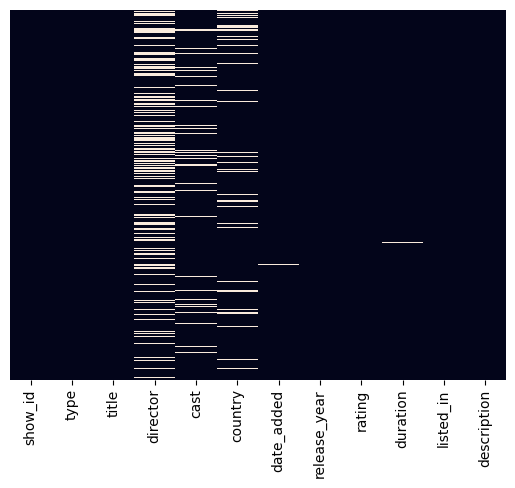

In [6]:
sns.heatmap(netfilx_df.isnull(), cbar=False, yticklabels=False)

Objectives:
- check for duplicated rows
- convert the "date_added", "duration" features into "datetime" format
- create a distinct DataFrame for both category of the "type" feature, will bring better result due to different nature they have

In [7]:
# making some cols look good

netfilx_df['cast'] = netfilx_df['cast'].fillna("No Cast Listed")
netfilx_df['director'] = netfilx_df['director'].fillna("Unknown")

In [8]:
netfilx_df.info()   # clearly no missimg values in the director and cast columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
# check for duplicate rows

netfilx_df.duplicated().sum()   # no duplicated rows

np.int64(0)

In [10]:
# converting the date_added feature into datetime format with the day_added and month_added as separate column

netfilx_df['date'] = pd.to_datetime(netfilx_df['date_added'].str.strip())   # stripping to prevent errors, in case if there are extra spaces
netfilx_df['day_added'] = netfilx_df['date'].dt.day
netfilx_df['month_added'] = netfilx_df['date'].dt.month

netfilx_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date', 'day_added', 'month_added'],
      dtype='object')

In [11]:
# creating 2 new dataFrame's 

netflix_movie = netfilx_df[netfilx_df['type'] == 'Movie'].copy()  # no shallow copy
netflix_tvshow = netfilx_df[netfilx_df['type'] == 'TV Show'].copy()  # without (), it will be a function not a dataFrame

# if not want to create two different dataframe 
# alternate way : using pd.get_dummies on the 'type' col; good for machine learning

In [12]:
# now for the 'duration' column

netflix_movie['movie_length'] = pd.to_numeric(netflix_movie['duration'].str.split(" ").str[0], errors='coerce').astype('Int64')
netflix_tvshow['movie_length'] = pd.to_numeric(netflix_tvshow['duration'].str.split(" ").str[0], errors='coerce').astype('Int64')
    # errors='coerce' tells pd.to_numeric() to replace invalid conversions with NaN instead of crashing
    # then astype('Int64') converts the column to the nullable integer type (Int64), which supports NaNs (unlike plain int)

In [13]:
netflix_movie.info() # we can see all the new added columns and its Dtype, will be same for netflix_tvshow

<class 'pandas.core.frame.DataFrame'>
Index: 6131 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6131 non-null   object        
 1   type          6131 non-null   object        
 2   title         6131 non-null   object        
 3   director      6131 non-null   object        
 4   cast          6131 non-null   object        
 5   country       5691 non-null   object        
 6   date_added    6131 non-null   object        
 7   release_year  6131 non-null   int64         
 8   rating        6129 non-null   object        
 9   duration      6128 non-null   object        
 10  listed_in     6131 non-null   object        
 11  description   6131 non-null   object        
 12  date          6131 non-null   datetime64[ns]
 13  day_added     6131 non-null   float64       
 14  month_added   6131 non-null   float64       
 15  movie_length  6128 non-null   Int64        